# Central Limit Theorem
## Packages and Config

In [72]:
using StatsPlots, LaTeXStrings, Statistics, StatsBase, Distributions, LinearAlgebra
figpath = "fig/"
Plots.default(titlefontsize=18, tickfontsize=10, labelfontsize=16,
    fontfamily="Computer Modern")

## Plots

In [52]:
# the average of rand() is expected to be 0.5, so we set μ=0.5
# also, we assume the standard deviation of our sample is roughly equal to
# the standard deviation of the "population" of the rng numbers
μ = 0.5
samples = 2000000
σ = std(rand(samples))

ns = [5, 10, 100, 1000]
ΣXₙ = Dict(n => [sum(rand(n)) for _ in 1:samples] for n in ns)

Dict{Int64, Vector{Float64}} with 4 entries:
  5    => [2.20279, 3.6155, 3.55986, 2.81526, 2.62971, 1.48526, 3.07166, 2.9733…
  10   => [5.48031, 3.40494, 6.15237, 4.08, 7.24832, 5.28431, 4.28324, 6.14022,…
  1000 => [487.762, 493.473, 501.03, 487.162, 506.397, 507.495, 498.636, 501.32…
  100  => [50.0315, 49.9265, 50.2548, 51.0118, 52.9457, 47.7659, 51.936, 53.498…

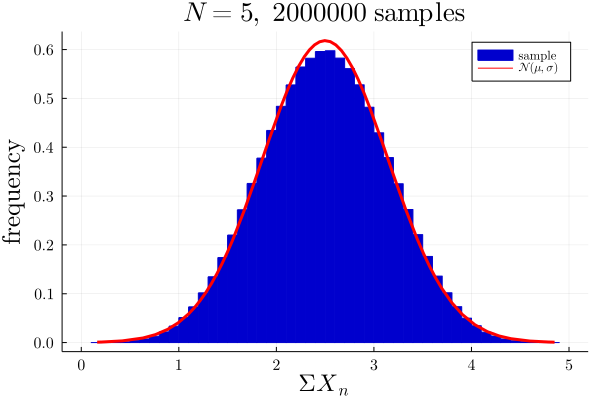

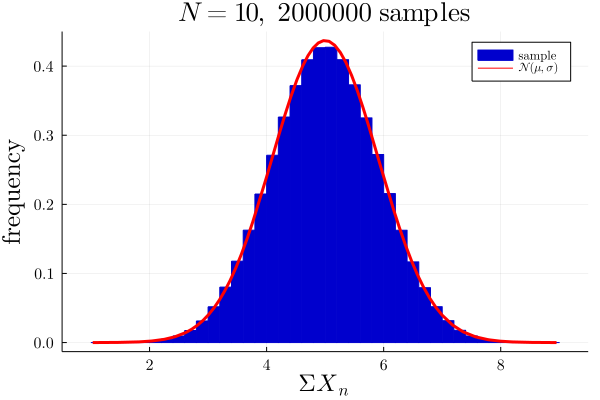

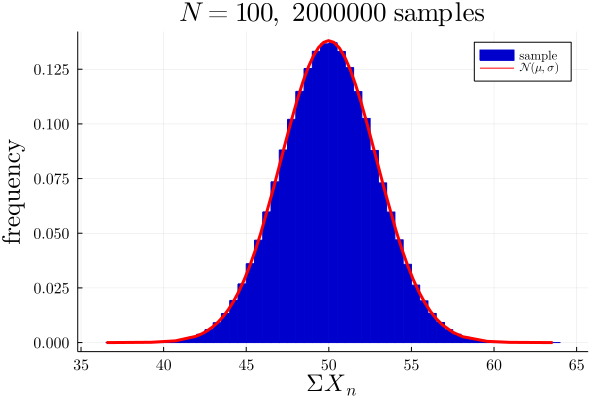

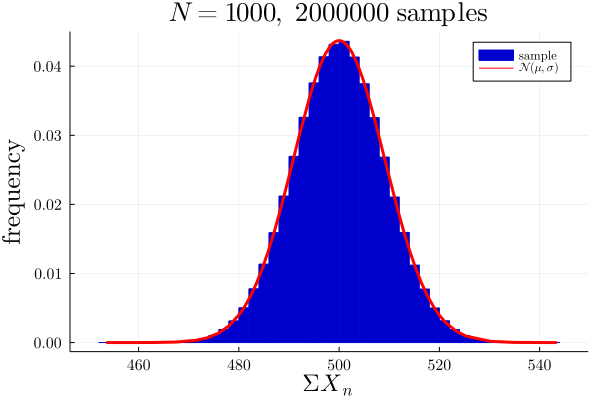

In [76]:
for n in ns
    hist = normalize(fit(Histogram, ΣXₙ[n], nbins=50), mode=:pdf)

    p = plot(hist, color=:mediumblue, lc=:match, label="sample",
        xlabel=L"\Sigma X_n", ylabel="frequency",
        title=L"N=%$n,\ %$samples\ \textrm{samples}")
    plot!(p, Normal(mean(ΣXₙ[n]), std(ΣXₙ[n])), extrema(ΣXₙ[n])...,
        color=:red, lw=3, label=L"\mathcal{N}(\mu, \sigma)")

    savefig(p, figpath * "normal-$n.pdf")
    display(p)
end